Summary : 
1. Logistic Regression:-  
a. scaling of values did not improve the AUC .   
b. AUC of 0.79 obtained with variables - 'Total day minutes','Customer service calls','International plan'    
c. AUC of 0.81 obtained with variables - 'Total day minutes','Total eve minutes','Customer service calls','International plan','Voice mail plan'.  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
from sklearn.metrics import  roc_auc_score, accuracy_score, classification_report, confusion_matrix, auc , roc_curve
from sklearn.model_selection import cross_val_predict, cross_val_score , train_test_split, cross_validate, StratifiedKFold, GridSearchCV


In [4]:
## Scale the values 
from sklearn.preprocessing import StandardScaler

In [5]:
import statsmodels.formula.api as sm

In [6]:
from sklearn.feature_selection import RFE

In [32]:
churn_data = pd.read_csv("data_telecom_churn.csv")

In [8]:
def file_details(filename):

    print(filename.head())
    print("\n")
    print(filename.info())
    print("\n")
    print("Null values:")
    print(filename.isnull().sum())

In [9]:
file_details(churn_data)

  State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47   

In [10]:
def perform_logreg(model , X_train,X_test,y_train,y_test):
    
    model.fit(X_train,y_train)
    
    print("\n Train Score : " + str(model.score(X_train,y_train)))
    train_pred = model.predict(X_train)

    accuracy = np.mean(y_train == train_pred)
    print("Train Accuracy using predicted labels :" + str(accuracy))


    test_pred = model.predict(X_test)
    

    print("Test set score using predicted labels: {:.2f}".format(np.mean(test_pred == y_test)))

    print("Calculated Test set score: {:.2f}".format(model.score(X_test,y_test)))

    print("Accuracy score :{:.3f}".format(accuracy_score(y_test,test_pred)))

    print("Confusion matrix :\n{}".format(confusion_matrix(y_test,test_pred)))
    
    print("\n Coefficients {}".format(model.coef_))

    ## Calculate the AUC and plot the ROC curve.
    test_prob = model.predict_proba(X_test)
    preds = test_prob[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    
    ## Plot ROC curve.
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    

In [11]:
## Hot encode the categorical variables .

def hot_encode(df, cols):
    ## Change the categorical columns to dummy variables . 
    
    for c in cols:
        col_dummies = pd.get_dummies(df[c], prefix_sep = "_", prefix = c)
        df = pd.concat([df,col_dummies] , axis = 1)
        df.drop(c , inplace = True , axis = 1)
    return df

In [12]:
cols = churn_data.columns.tolist()
print(cols)

['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']


In [14]:
cols[6:9]

['Total day minutes', 'Total day calls', 'Total day charge']


 X_train : (2666, 3)

 X_test : (667, 3)

 y_train : (2666,)

 y_test : (667,)

 Train Score : 0.606526631658
Train Accuracy using predicted labels :0.606526631658
Test set score using predicted labels: 0.61
Calculated Test set score: 0.61
Accuracy score :0.615
Confusion matrix :
[[361 209]
 [ 48  49]]

 Coefficients [[ 0.00946713  0.0002304  -0.00351973]]


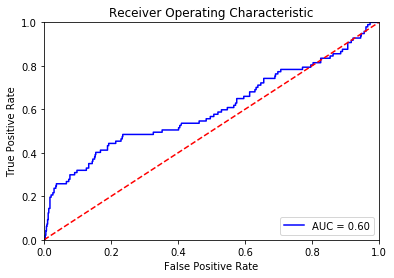

In [16]:
X_train, X_test, y_train, y_test  = train_test_split(churn_data[cols[6:9]], churn_data['Churn'] , random_state = 1 , test_size = 0.2, stratify = churn_data['Churn'])
print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_test.shape))
##
#X_train = X_train.values.reshape(-1,1)
#X_test = X_test.values.reshape(-1,1)

lg = LogisticRegression(class_weight = 'balanced')
perform_logreg(lg , X_train,X_test,y_train,y_test )

In [61]:
auc_results = {(",").join(cols[6:9]) : 0.6}

Check with scaled values.  


 Modeling with scaled values .....

 X_train : (2666, 3)

 X_test : (667, 3)

 y_train : (2666,)

 y_test : (667,)

 Train Score : 0.610652663166
Train Accuracy using predicted labels :0.610652663166
Test set score using predicted labels: 0.62
Calculated Test set score: 0.62
Accuracy score :0.616
Confusion matrix :
[[362 208]
 [ 48  49]]

 Coefficients [[ 0.24574495  0.01923234  0.24571064]]


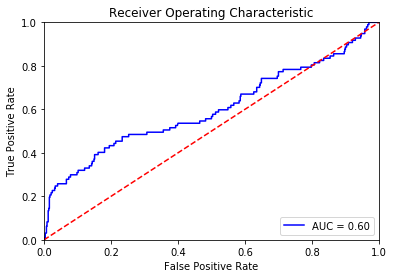

In [18]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(churn_data[cols[6:9]])
X_train, X_test, y_train, y_test  = train_test_split(scaled_data, churn_data['Churn'] , random_state = 1 , test_size = 0.2, stratify = churn_data['Churn'])
print("\n Modeling with scaled values .....")
print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_test.shape))
##
#X_train = X_train.values.reshape(-1,1)
#X_test = X_test.values.reshape(-1,1)

lg = LogisticRegression(class_weight = 'balanced')
perform_logreg(lg , X_train,X_test,y_train,y_test )


Scaled values do not improve the model.  


 X_train : (2666, 3)

 X_test : (667, 3)

 y_train : (2666,)

 y_test : (667,)

 Train Score : 0.552513128282
Train Accuracy using predicted labels :0.552513128282
Test set score using predicted labels: 0.55
Calculated Test set score: 0.55
Accuracy score :0.555
Confusion matrix :
[[316 254]
 [ 43  54]]

 Coefficients [[ 0.01945143  0.00191405 -0.16112712]]


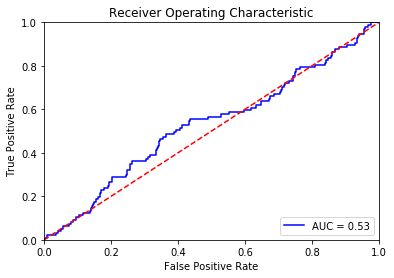

In [19]:
X_train, X_test, y_train, y_test  = train_test_split(churn_data[cols[9:12]], churn_data['Churn'] , random_state = 1 , test_size = 0.2, stratify = churn_data['Churn'])
print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_test.shape))
##
#X_train = X_train.values.reshape(-1,1)
#X_test = X_test.values.reshape(-1,1)

lg = LogisticRegression(class_weight = 'balanced')
perform_logreg(lg , X_train,X_test,y_train,y_test )

In [62]:
auc_results[(",").join(cols[9:12])] = 0.53


 X_train : (2666, 3)

 X_test : (667, 3)

 y_train : (2666,)

 y_test : (667,)

 Train Score : 0.510127531883
Train Accuracy using predicted labels :0.510127531883
Test set score using predicted labels: 0.51
Calculated Test set score: 0.51
Accuracy score :0.514
Confusion matrix :
[[295 275]
 [ 49  48]]

 Coefficients [[-0.00079476  0.00155657  0.05307771]]


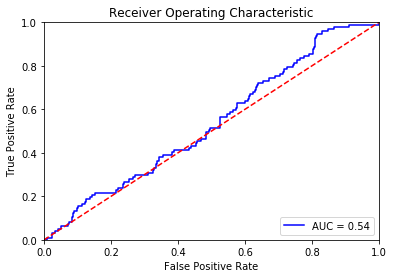

In [21]:
X_train, X_test, y_train, y_test  = train_test_split(churn_data[cols[12:15]], churn_data['Churn'] , random_state = 1 , test_size = 0.2, stratify = churn_data['Churn'])
print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_test.shape))
##
#X_train = X_train.values.reshape(-1,1)
#X_test = X_test.values.reshape(-1,1)

lg = LogisticRegression(class_weight = 'balanced')
perform_logreg(lg , X_train,X_test,y_train,y_test )

In [63]:
auc_results[(",").join(cols[12:15])] = 0.54


 X_train : (2666, 3)

 X_test : (667, 3)

 y_train : (2666,)

 y_test : (667,)

 Train Score : 0.542010502626
Train Accuracy using predicted labels :0.542010502626
Test set score using predicted labels: 0.54
Calculated Test set score: 0.54
Accuracy score :0.541
Confusion matrix :
[[313 257]
 [ 49  48]]

 Coefficients [[ 0.05649437 -0.05341251  0.1138368 ]]


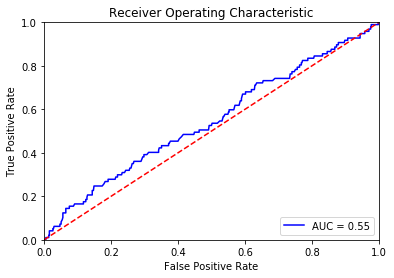

In [23]:
X_train, X_test, y_train, y_test  = train_test_split(churn_data[cols[15:18]], churn_data['Churn'] , random_state = 1 , test_size = 0.2, stratify = churn_data['Churn'])
print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_test.shape))
##
#X_train = X_train.values.reshape(-1,1)
#X_test = X_test.values.reshape(-1,1)

lg = LogisticRegression(class_weight = 'balanced')
perform_logreg(lg , X_train,X_test,y_train,y_test )

In [64]:
auc_results[(",").join(cols[15:18])] = 0.55


 X_train : (2666,)

 X_test : (667,)

 y_train : (2666,)

 y_test : (667,)

 Train Score : 0.587021755439
Train Accuracy using predicted labels :0.587021755439
Test set score using predicted labels: 0.55
Calculated Test set score: 0.55
Accuracy score :0.552
Confusion matrix :
[[308 262]
 [ 37  60]]

 Coefficients [[ 0.32462268]]


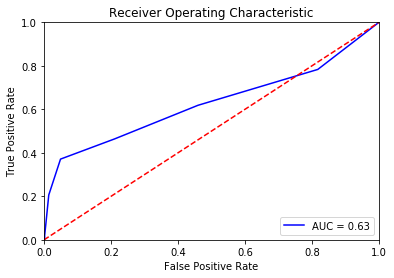

In [25]:
X_train, X_test, y_train, y_test  = train_test_split(churn_data[cols[18]], churn_data['Churn'] , random_state = 1 , test_size = 0.2, stratify = churn_data['Churn'])
print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_test.shape))
##
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

lg = LogisticRegression(class_weight = 'balanced')
perform_logreg(lg , X_train,X_test,y_train,y_test )

In [65]:
auc_results[cols[18]] = 0.63


 X_train : (2666, 2)

 X_test : (667, 2)

 y_train : (2666,)

 y_test : (667,)

 Train Score : 0.699174793698
Train Accuracy using predicted labels :0.699174793698
Test set score using predicted labels: 0.67
Calculated Test set score: 0.67
Accuracy score :0.673
Confusion matrix :
[[379 191]
 [ 27  70]]

 Coefficients [[ 0.01127068  0.42728929]]


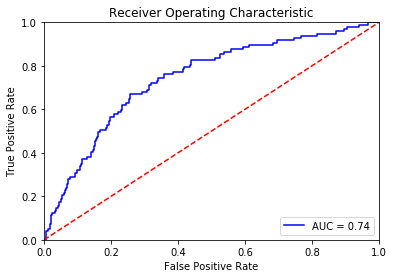

In [27]:
X_train, X_test, y_train, y_test  = train_test_split(churn_data[['Total day minutes','Customer service calls']], churn_data['Churn'] , random_state = 1 , test_size = 0.2, stratify = churn_data['Churn'])
print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_test.shape))
##
#X_train = X_train.values.reshape(-1,1)
#X_test = X_test.values.reshape(-1,1)

lg = LogisticRegression(class_weight = 'balanced')
perform_logreg(lg , X_train,X_test,y_train,y_test )

In [66]:
auc_results[(",").join(['Total day minutes','Customer service calls'])] = 0.74


 X_train : (2666,)

 X_test : (667,)

 y_train : (2666,)

 y_test : (667,)

 Train Score : 0.372843210803
Train Accuracy using predicted labels :0.372843210803
Test set score using predicted labels: 0.37
Calculated Test set score: 0.37
Accuracy score :0.375
Confusion matrix :
[[170 400]
 [ 17  80]]

 Coefficients [[-0.019897]]


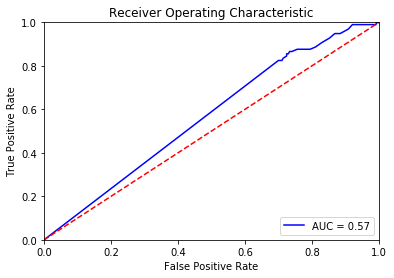

In [29]:
X_train, X_test, y_train, y_test  = train_test_split(churn_data[cols[5]], churn_data['Churn'] , random_state = 1 , test_size = 0.2, stratify = churn_data['Churn'])
print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_test.shape))
##
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

lg = LogisticRegression(class_weight = 'balanced')
perform_logreg(lg , X_train,X_test,y_train,y_test )

In [67]:
auc_results[cols[5]] = 0.57


 X_train : (2666, 2)

 X_test : (667, 2)

 y_train : (2666,)

 y_test : (667,)

 Train Score : 0.841710427607
Train Accuracy using predicted labels :0.841710427607
Test set score using predicted labels: 0.84
Calculated Test set score: 0.84
Accuracy score :0.835
Confusion matrix :
[[532  38]
 [ 72  25]]

 Coefficients [[-0.67695245  1.07956899]]


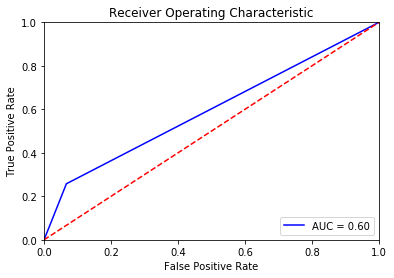

In [31]:
predictors = churn_data[cols[3:4]]
predictors = hot_encode(predictors , cols[3:4])

X_train, X_test, y_train, y_test  = train_test_split(predictors, churn_data['Churn'] , random_state = 1 , test_size = 0.2, stratify = churn_data['Churn'])
print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_test.shape))
##
#X_train = X_train.values.reshape(-1,1)
#X_test = X_test.values.reshape(-1,1)

lg = LogisticRegression(class_weight = 'balanced')
perform_logreg(lg , X_train,X_test,y_train,y_test )

In [68]:
auc_results[cols[3]] = 0.6


 X_train : (2666, 2)

 X_test : (667, 2)

 y_train : (2666,)

 y_test : (667,)

 Train Score : 0.372843210803
Train Accuracy using predicted labels :0.372843210803
Test set score using predicted labels: 0.38
Calculated Test set score: 0.38
Accuracy score :0.376
Confusion matrix :
[[171 399]
 [ 17  80]]

 Coefficients [[ 0.30863018 -0.4474876 ]]


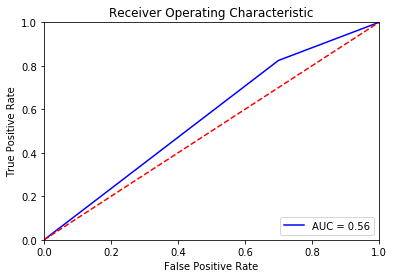

In [33]:
predictors = churn_data[cols[4:5]]
predictors = hot_encode(predictors , cols[4:5])

X_train, X_test, y_train, y_test  = train_test_split(predictors, churn_data['Churn'] , random_state = 1 , test_size = 0.2, stratify = churn_data['Churn'])
print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_test.shape))
##
#X_train = X_train.values.reshape(-1,1)
#X_test = X_test.values.reshape(-1,1)

lg = LogisticRegression(class_weight = 'balanced')
perform_logreg(lg , X_train,X_test,y_train,y_test )

In [69]:
auc_results[cols[4]] = 0.56


 X_train : (2666, 4)

 X_test : (667, 4)

 y_train : (2666,)

 y_test : (667,)

 Train Score : 0.755438859715
Train Accuracy using predicted labels :0.755438859715
Test set score using predicted labels: 0.75
Calculated Test set score: 0.75
Accuracy score :0.747
Confusion matrix :
[[430 140]
 [ 29  68]]

 Coefficients [[ 0.0132923   0.52822856 -2.0595604   0.24850846]]


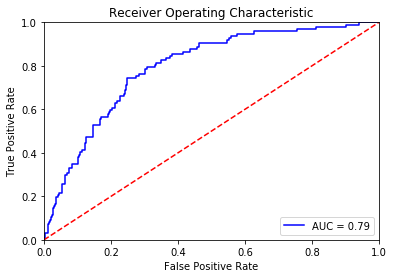

In [35]:
predictors = churn_data[['Total day minutes','Customer service calls','International plan']]
predictors = hot_encode(predictors , ['International plan'])

X_train, X_test, y_train, y_test  = train_test_split(predictors, churn_data['Churn'] , random_state = 1 , test_size = 0.2, stratify = churn_data['Churn'])
print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_test.shape))
##
#X_train = X_train.values.reshape(-1,1)
#X_test = X_test.values.reshape(-1,1)

lg = LogisticRegression(class_weight = 'balanced')
perform_logreg(lg , X_train,X_test,y_train,y_test )

In [70]:
auc_results[(",").join(['Total day minutes','Customer service calls','International plan'])] = 0.79

In [37]:
auc_results

{'Total day minutes,Total day calls,Total day charge': 0.6,
 'Total eve minutes,Total eve calls,Total eve charge': 0.53,
 'Total night minutes,Total night calls,Total night charge': 0.54,
 'Total intl minutes,Total intl calls,Total intl charge': 0.55,
 'Customer service calls': 0.63,
 ('Total day minutes', 'Customer service calls'): 0.74,
 'Number vmail messages': 0.57,
 'International plan': 0.6,
 'Voice mail plan': 0.56,
 ('Total day minutes', 'Customer service calls', 'International plan'): 0.79}

Use GridSearchCV to tune parameters .


 X_train : (2666, 4)

 X_test : (667, 4)

 y_train : (2666,)

 y_test : (667,)
{'C': 0.1, 'penalty': 'l1'}
Test set score using predicted labels: 0.75
Calculated Test set score: 0.75
Accuracy score :0.748
Confusion matrix :
[[430 140]
 [ 28  69]]


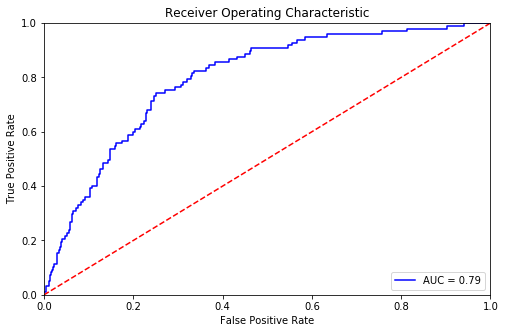

In [40]:
predictors = churn_data[['Total day minutes','Customer service calls','International plan']]
predictors = hot_encode(predictors , ['International plan'])

X_train, X_test, y_train, y_test  = train_test_split(predictors, churn_data['Churn'] , random_state = 1 , test_size = 0.2, stratify = churn_data['Churn'])
print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_test.shape))
## 
param_grid = {
    'penalty' : ['l1','l2'],
    'C' : [0.01,0.1,1],
    }
lg = LogisticRegression(class_weight = 'balanced')
grid_search = GridSearchCV(lg, param_grid, cv=5, scoring = 'roc_auc')
grid_search.fit(X_train, y_train)
#
print(grid_search.best_params_)
#
lg_best = grid_search.best_estimator_
lg_predictions = lg_best.predict(X_test)
#
print("Test set score using predicted labels: {:.2f}".format(np.mean(lg_predictions == y_test)))

print("Calculated Test set score: {:.2f}".format(lg_best.score(X_test,y_test)))

print("Accuracy score :{:.3f}".format(accuracy_score(y_test,lg_predictions)))

print("Confusion matrix :\n{}".format(confusion_matrix(y_test,lg_predictions)))
##
## Calculate the AUC and plot the ROC curve.
test_prob = lg_best.predict_proba(X_test)
preds = test_prob[:,1]
fpr, tpr, thresholds = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
    
## Plot ROC curve.
plt.figure(figsize = (8,5))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Using RFE for feature selection.  


 X_train : (2666, 18)

 X_test : (667, 18)

 y_train : (2666,)

 y_test : (667,)
Selected Features:

Total day minutes
Total eve minutes
Total intl minutes
Total intl calls
Customer service calls
International plan_No
Voice mail plan_Yes


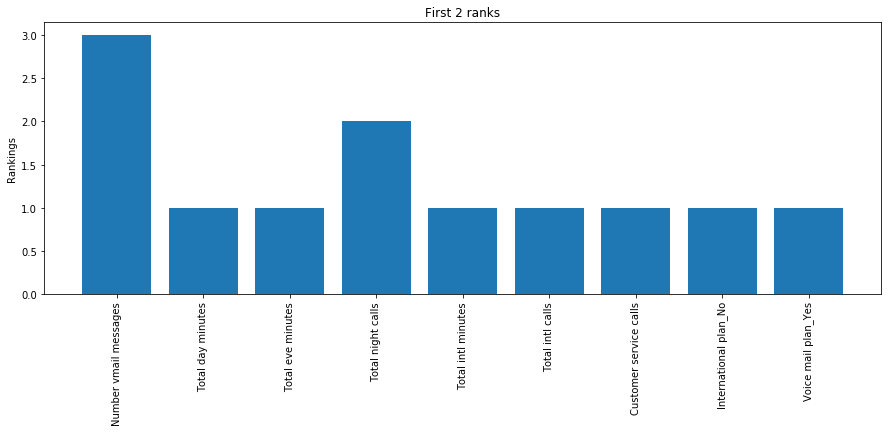

In [46]:
predictors = churn_data[['Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls','International plan', 'Voice mail plan']]
predictors = hot_encode(predictors , ['International plan', 'Voice mail plan'])
##
X_train, X_test, y_train, y_test  = train_test_split(predictors, churn_data['Churn'] , random_state = 1 , test_size = 0.2, stratify = churn_data['Churn'])
print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_test.shape))


lg = LogisticRegression(class_weight = 'balanced', penalty = 'l1', C = 0.1)
rfe = RFE(lg, 7)
fit = rfe.fit(X_train, y_train)
# report selected features
names = X_train.columns
print('Selected Features:\n')
for i in range(len(fit.support_)):
	if fit.support_[i]:
		print(names[i])
##
# plot feature rank

ticks = [i for i in range(len(names))]
selected_ranking = []
selected_ticks = []
ranking = list(fit.ranking_)
for i in range(len(names)):
    if (ranking[i] == 1) | (ranking[i] == 2 | (ranking[i] ==3)):
        selected_ranking.append(ranking[i])
        selected_ticks.append(list(names)[i])
        
plt.figure(figsize = (15,5))
plt.bar(selected_ticks, selected_ranking)
plt.xticks(selected_ticks, rotation = 90)
plt.ylabel("Rankings")
plt.title("First 2 ranks")
plt.show()


Modelling with the selected features....   


 X_train : (2666, 9)

 X_test : (667, 9)

 y_train : (2666,)

 y_test : (667,)

 Train Score : 0.767066766692
Train Accuracy using predicted labels :0.767066766692
Test set score using predicted labels: 0.75
Calculated Test set score: 0.75
Accuracy score :0.750
Confusion matrix :
[[429 141]
 [ 26  71]]

 Coefficients [[ 0.01153339  0.00542631  0.04454593 -0.06226492  0.51442441 -2.23231354
   0.          0.         -0.71118804]]


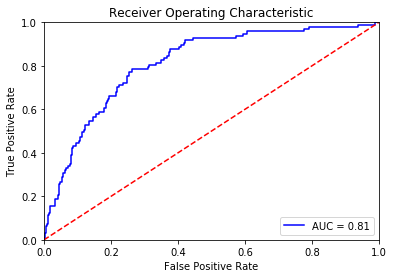

In [45]:
predictors = churn_data[['Total day minutes','Total eve minutes','Total intl minutes','Total intl calls','Customer service calls','International plan', 'Voice mail plan']]
predictors = hot_encode(predictors , ['International plan','Voice mail plan'])

X_train, X_test, y_train, y_test  = train_test_split(predictors, churn_data['Churn'] , random_state = 1 , test_size = 0.2, stratify = churn_data['Churn'])
print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_test.shape))
##
#X_train = X_train.values.reshape(-1,1)
#X_test = X_test.values.reshape(-1,1)

lg = LogisticRegression(class_weight = 'balanced', penalty = 'l1', C = 0.1)
perform_logreg(lg , X_train,X_test,y_train,y_test )


 X_train : (2666, 7)

 X_test : (667, 7)

 y_train : (2666,)

 y_test : (667,)

 Train Score : 0.771942985746
Train Accuracy using predicted labels :0.771942985746
Test set score using predicted labels: 0.75
Calculated Test set score: 0.75
Accuracy score :0.754
Confusion matrix :
[[434 136]
 [ 28  69]]

 Coefficients [[ 0.01134622  0.0054506   0.51609787 -2.29344891  0.          0.
  -0.71097933]]


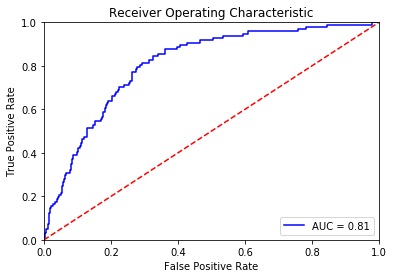

In [52]:
predictors = churn_data[['Total day minutes','Total eve minutes','Customer service calls','International plan','Voice mail plan']]
predictors = hot_encode(predictors , ['International plan','Voice mail plan'])

X_train, X_test, y_train, y_test  = train_test_split(predictors, churn_data['Churn'] , random_state = 1 , test_size = 0.2, stratify = churn_data['Churn'])
print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_test.shape))
##

lg = LogisticRegression(class_weight = 'balanced', penalty = 'l1', C = 0.1)
perform_logreg(lg , X_train,X_test,y_train,y_test )

In [71]:
auc_results[(",").join(['Total day minutes','Total eve minutes','Customer service calls','International plan','Voice mail plan'])] = 0.81

In [14]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(churn_data[['Total day minutes','Total eve minutes','Customer service calls']])


In [22]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(churn_data[['Total day minutes','Total eve minutes','Customer service calls']]
churn_data['Total day minutes_s'] = scaled_data[:,0]
churn_data['Total eve minutes_s'] = scaled_data[:,1]
churn_data['Customer service calls_s'] = scaled_data[:,2]



 Modeling with scaled values .....

 X_train : (2666, 7)

 X_test : (667, 7)

 y_train : (2666,)

 y_test : (667,)

 Train Score : 0.770817704426
Train Accuracy using predicted labels :0.770817704426
Test set score using predicted labels: 0.76
Calculated Test set score: 0.76
Accuracy score :0.756
Confusion matrix :
[[434 136]
 [ 27  70]]

 Coefficients [[ 0.69561523  0.37128642  0.75832833 -1.13802193  1.26657746  0.46676525
  -0.33820973]]


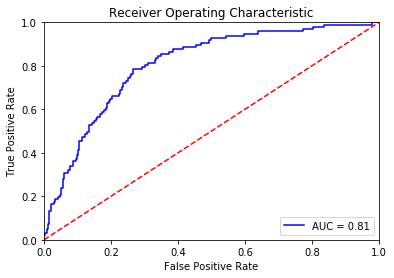

In [23]:
predictors = churn_data[['Total day minutes_s','Total eve minutes_s','Customer service calls_s','International plan','Voice mail plan']]
predictors = hot_encode(predictors , ['International plan','Voice mail plan'])
##
X_train, X_test, y_train, y_test  = train_test_split(predictors, churn_data['Churn'] , random_state = 1 , test_size = 0.2, stratify = churn_data['Churn'])
print("\n Modeling with scaled values .....")
print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_test.shape))
##
#X_train = X_train.values.reshape(-1,1)
#X_test = X_test.values.reshape(-1,1)

lg = LogisticRegression(class_weight = 'balanced')
perform_logreg(lg , X_train,X_test,y_train,y_test )


The final model too does not perform better with scaled data.

Croos Val score and predict.  

In [24]:
kf = StratifiedKFold(n_splits = 5, shuffle = True)
## Cross Validate with roc_auc as the metric 
predictors = churn_data[['Total day minutes','Total eve minutes','Customer service calls','International plan','Voice mail plan']]
predictors = hot_encode(predictors , ['International plan','Voice mail plan'])

target = churn_data['Churn']

lg = LogisticRegression(class_weight = 'balanced', penalty = 'l1', C = 0.1)

scores = cross_val_score(lg, predictors , target, cv = kf, scoring = 'roc_auc' )
predicted = cross_val_predict(lg,predictors , target, cv = kf, method = 'predict_proba' )
print(scores)
print("\n Avg AUC score :{}".format(scores.mean()))

[ 0.79316332  0.81506602  0.85518177  0.8094481   0.81986477]

 Avg AUC score :0.818544794115874


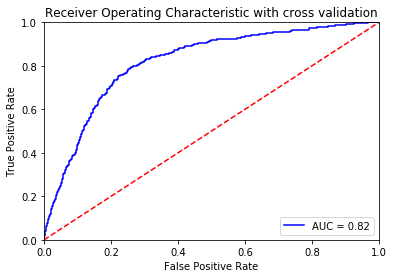

In [27]:
preds = predicted[:,1]
fpr, tpr, thresholds = roc_curve(churn_data['Churn'], preds)
roc_auc = auc(fpr, tpr)
##
## Plot ROC curve.
plt.title('Receiver Operating Characteristic with cross validation')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [33]:
churn_data.rename(columns = {'Total day minutes' : 'Total_day_minutes' ,"Total eve minutes" : "Total_eve_minutes" , "Customer service calls" : "Customer_service_calls",
                              "International plan": "International_plan", "Voice mail plan" : "Voice_mail_plan" }, inplace = True)

In [39]:
churn_data['Churn'].head()

0    False
1    False
2    False
3    False
4    False
Name: Churn, dtype: bool

In [41]:
def change_bool(x):
    if x == False:
        return  0
    else:
        return 1
    
churn_data['Churn1'] = churn_data['Churn'].apply(lambda x: change_bool(x) )

In [42]:
user_mod = sm.logit('Churn1 ~ Total_day_minutes + Total_eve_minutes + Customer_service_calls + C(International_plan) + C(Voice_mail_plan)' , data = churn_data).fit()
print(user_mod.summary2())

Optimization terminated successfully.
         Current function value: 0.331217
         Iterations 7
                               Results: Logit
Model:                   Logit               Pseudo R-squared:    0.200      
Dependent Variable:      Churn1              AIC:                 2219.8929  
Date:                    2020-06-29 19:43    BIC:                 2256.5627  
No. Observations:        3333                Log-Likelihood:      -1103.9    
Df Model:                5                   LL-Null:             -1379.1    
Df Residuals:            3327                LLR p-value:         1.0478e-116
Converged:               1.0000              Scale:               1.0000     
No. Iterations:          7.0000                                              
-----------------------------------------------------------------------------
                              Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------------

Text(0.5,1,'AUC results ')

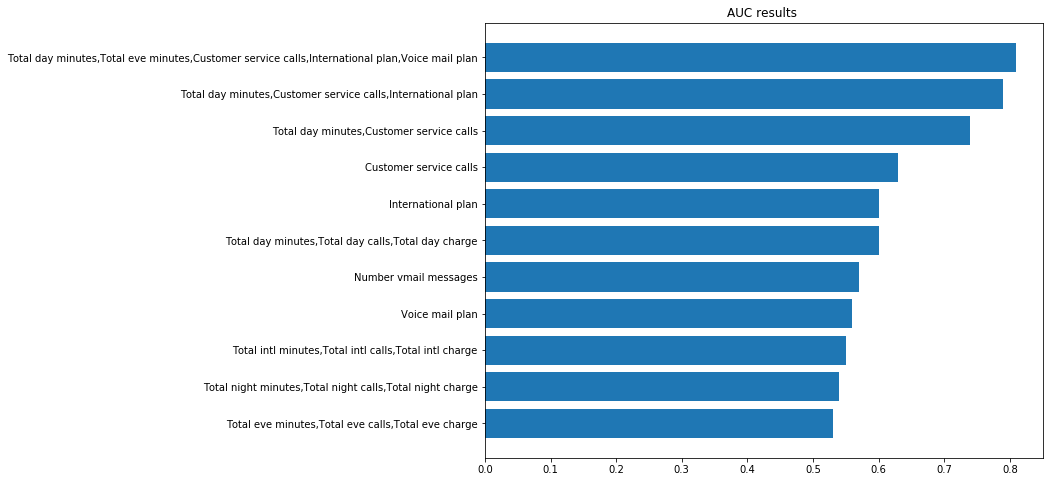

In [92]:
plt.figure(figsize = (10,8))
x = [k for k,v in sorted(auc_results.items(), key = lambda item : item[1])]
y = [v for k,v in sorted(auc_results.items(), key = lambda item : item[1])]
plt.barh(x,y)
plt.title("AUC results ")